In [2]:
import pandas as pd

In [6]:
one_train = pd.read_csv('./data/one2one_training.csv')
print(one_train.shape)
one_train

(4982, 5)


,game,date,player 1,player 2,winner
0,0,29,3497,1112,p2
1,1,29,3977,2276,p2
2,2,29,852,4337,p2
3,3,29,3846,2861,p2
4,4,29,2664,2474,p1
...,...,...,...,...,...
4977,4977,31,2263,4995,p2
4978,4978,31,5125,1948,p1
4979,4979,31,807,3495,p2
4980,4980,31,5263,1786,p2


In [7]:
one_train['date'].unique()

array([29, 30, 31], dtype=int64)

In [8]:
one_valid_q = pd.read_csv('./data/one2one_valid_query.csv')
print(one_valid_q.shape)
one_valid_q.head()

(623, 4)


,game,date,player 1,player 2
0,4982,31,1004,1137
1,4983,31,3939,2667
2,4984,31,3798,3443
3,4985,31,1039,2791
4,4986,31,5659,3542


In [9]:
one_valid_q['date'].unique()

array([31, 32], dtype=int64)

In [10]:
one_valid_a = pd.read_csv('./data/one2one_valid_answer.csv')
print(one_valid_a.shape)
one_valid_a.head()

(623, 2)


,game,winner
0,4982,p2
1,4983,p2
2,4984,p2
3,4985,p1
4,4986,p1


In [11]:
one_test_q = pd.read_csv('./data/one2one_test_query.csv')
print(one_test_q.shape)
one_test_q.head()

(568, 4)


,game,date,player 1,player 2
0,5605,32,4206,5069
1,5606,32,2756,4506
2,5607,32,2744,3742
3,5608,32,4836,160
4,5609,32,2410,3104


In [12]:
one_test_q['date'].unique()

array([32], dtype=int64)

In [13]:
one_valid = pd.merge(one_valid_q, one_valid_a[['game','winner']], on='game')
print(one_valid.shape)
one_valid.head()

(623, 5)


,game,date,player 1,player 2,winner
0,4982,31,1004,1137,p2
1,4983,31,3939,2667,p2
2,4984,31,3798,3443,p2
3,4985,31,1039,2791,p1
4,4986,31,5659,3542,p1


In [14]:
# train + valid
one_train_valid = pd.concat([one_train, one_valid], axis=0, ignore_index=True)
one_train_valid

,game,date,player 1,player 2,winner
0,0,29,3497,1112,p2
1,1,29,3977,2276,p2
2,2,29,852,4337,p2
3,3,29,3846,2861,p2
4,4,29,2664,2474,p1
...,...,...,...,...,...
5600,5600,32,4389,4045,p1
5601,5601,32,2665,1087,p2
5602,5602,32,239,3819,p1
5603,5603,32,4463,2410,p2


In [15]:
train_players = one_train['player 1'].tolist() + one_train['player 2'].tolist()

train_players = set(train_players)

len(train_players)

1491

In [16]:
valid_players = one_valid['player 1'].tolist() + one_valid['player 2'].tolist()

valid_players = set(valid_players)

len(valid_players)

267

In [17]:
test_players = one_test_q['player 1'].tolist() + one_test_q['player 2'].tolist()

test_players = set(test_players)

len(test_players)

320

In [18]:
unique_valid = valid_players.difference(train_players)
print(f'train에 없지만 valid에 있는 애들: {len(unique_valid)}')

train에 없지만 valid에 있는 애들: 74


In [19]:
union_players = train_players.union(valid_players)
print(f'train or valid에 있는 애들: {len(union_players)}')

train or valid에 있는 애들: 1565


In [20]:
unique_test1 = test_players.difference(train_players)
print(f'train에 없지만 test에 있는 애들: {len(unique_test1)}')
unique_test2 = test_players.difference(union_players)
print(f'train 또는 valid에 없지만 test에 있는 애들: {len(unique_test2)}')

train에 없지만 test에 있는 애들: 125
train 또는 valid에 없지만 test에 있는 애들: 107


In [21]:
from collections import defaultdict


player_records = defaultdict(lambda: [0, 0, 0])

for index, row in one_train.iterrows():
    player1 = row['player 1']
    player2 = row['player 2']
    winner = row['winner']
    
    if winner == 'p1':
        player_records[player1][0] += 1  
        player_records[player2][2] += 1  
    elif winner == 'p2':
        player_records[player1][2] += 1  
        player_records[player2][0] += 1  
    elif winner == 'DRAW':
        player_records[player1][1] += 1  
        player_records[player2][1] += 1  

for player, record in player_records.items():
    print(f'{player}: {record}')

3497: [2, 1, 2]
1112: [8, 0, 5]
3977: [5, 4, 21]
2276: [2, 4, 5]
852: [0, 0, 1]
4337: [1, 0, 2]
3846: [0, 5, 6]
2861: [1, 0, 0]
2664: [6, 1, 1]
2474: [11, 3, 3]
532: [0, 0, 1]
1468: [7, 1, 3]
1746: [0, 1, 2]
1838: [0, 0, 2]
2760: [2, 0, 2]
5481: [0, 0, 1]
3480: [0, 0, 1]
1432: [1, 0, 0]
784: [0, 0, 1]
1010: [6, 2, 16]
2285: [0, 0, 1]
5862: [2, 0, 2]
291: [17, 3, 7]
2778: [0, 1, 0]
3766: [23, 5, 10]
463: [20, 3, 9]
1047: [13, 0, 4]
267: [3, 0, 6]
5175: [0, 0, 1]
4685: [1, 1, 7]
542: [5, 4, 6]
5842: [0, 0, 1]
86: [7, 2, 0]
1160: [10, 2, 5]
76: [1, 1, 1]
3901: [0, 0, 1]
1043: [8, 1, 3]
5956: [0, 0, 2]
4711: [1, 0, 3]
5435: [1, 0, 0]
3635: [9, 3, 2]
1879: [0, 1, 1]
5407: [3, 2, 4]
3919: [0, 0, 2]
5969: [2, 0, 3]
376: [6, 3, 6]
1223: [1, 1, 2]
1943: [6, 1, 2]
4731: [0, 0, 1]
2665: [60, 5, 6]
3173: [2, 3, 15]
4364: [1, 0, 0]
3152: [0, 0, 2]
5756: [3, 2, 1]
2341: [0, 0, 2]
1842: [0, 1, 2]
4095: [0, 0, 1]
419: [0, 0, 2]
63: [10, 1, 10]
45: [9, 4, 3]
2950: [0, 0, 1]
3176: [1, 0, 2]
2869: [12, 1

In [22]:
# player 당 총 게임 수
num_plays = {}

for player, record in player_records.items():
    plays = sum(record)
    num_plays[player] = plays

for player, plays in num_plays.items():
    print(f'{player}: {plays}')

3497: 5
1112: 13
3977: 30
2276: 11
852: 1
4337: 3
3846: 11
2861: 1
2664: 8
2474: 17
532: 1
1468: 11
1746: 3
1838: 2
2760: 4
5481: 1
3480: 1
1432: 1
784: 1
1010: 24
2285: 1
5862: 4
291: 27
2778: 1
3766: 38
463: 32
1047: 17
267: 9
5175: 1
4685: 9
542: 15
5842: 1
86: 9
1160: 17
76: 3
3901: 1
1043: 12
5956: 2
4711: 4
5435: 1
3635: 14
1879: 2
5407: 9
3919: 2
5969: 5
376: 15
1223: 4
1943: 9
4731: 1
2665: 71
3173: 20
4364: 1
3152: 2
5756: 6
2341: 2
1842: 3
4095: 1
419: 2
63: 21
45: 16
2950: 1
3176: 3
2869: 46
2342: 3
2581: 30
3718: 4
4769: 4
5136: 15
5767: 8
4084: 6
4727: 11
3440: 5
2730: 26
2335: 5
5863: 4
5546: 17
1051: 1
3118: 8
1851: 1
1841: 43
3933: 13
1054: 2
3957: 12
3014: 1
3046: 2
1024: 1
3729: 24
5814: 3
3012: 1
5752: 45
1412: 10
5577: 14
5034: 62
475: 7
3142: 15
5783: 11
3588: 1
3926: 20
302: 14
90: 8
3019: 2
975: 16
2470: 1
1428: 64
5314: 2
3878: 20
5674: 18
5612: 9
5311: 4
126: 58
598: 25
2994: 6
4702: 24
2418: 2
2600: 2
794: 3
1362: 21
5765: 10
2034: 3
2752: 2
3213: 4
1039: 63
2

In [23]:
one_train['players'] = one_train.apply(lambda row: {row['player 1'], row['player 2']}, axis=1)

# 각 player의 날짜별 게임 수
game_counts = one_train.explode('players').groupby(['players', 'date']).size()

# player의 게임을 한 날짜 수
date_counts = game_counts.groupby('players').count()

# player 별 총 게임 수
total_game_counts = game_counts.groupby('players').sum()

# 하루 평균 게임 수
average_game_counts = total_game_counts / date_counts

plays_per_day = average_game_counts.to_dict()

for player, plays in plays_per_day.items():
    print(f'{player}: {plays}')

11: 4.0
12: 1.0
14: 10.0
26: 1.0
30: 2.0
31: 3.5
32: 1.0
37: 4.0
44: 16.0
45: 8.0
52: 1.0
58: 1.0
59: 9.0
63: 10.5
70: 1.0
72: 3.0
76: 3.0
81: 5.0
86: 4.5
89: 1.0
90: 4.0
97: 1.0
106: 12.0
117: 1.0
122: 5.5
125: 1.0
126: 29.0
127: 1.5
139: 1.0
142: 16.0
148: 13.333333333333334
152: 3.3333333333333335
162: 3.0
165: 1.0
166: 11.0
168: 3.0
173: 10.5
174: 6.0
175: 11.0
179: 8.5
180: 2.0
184: 4.0
186: 1.0
190: 3.0
191: 1.0
196: 14.0
200: 6.0
202: 3.0
216: 1.0
223: 1.0
229: 3.0
233: 4.0
237: 2.0
238: 1.0
239: 11.0
243: 5.5
247: 8.0
251: 1.0
254: 2.0
255: 12.0
256: 1.0
258: 2.0
267: 4.5
276: 2.0
280: 2.0
281: 2.5
288: 1.0
291: 13.5
292: 1.0
297: 3.0
300: 7.0
302: 4.666666666666667
304: 1.5
311: 3.0
313: 1.0
317: 2.0
319: 1.0
321: 3.0
326: 3.0
327: 1.0
335: 2.0
343: 4.0
344: 1.0
345: 1.0
348: 2.0
361: 2.0
367: 3.0
376: 5.0
382: 4.5
387: 1.0
390: 4.0
393: 1.0
400: 1.5
406: 1.0
408: 1.0
409: 4.0
410: 12.0
411: 4.0
412: 12.0
413: 2.0
414: 4.0
419: 2.0
421: 2.0
422: 4.333333333333333
423: 1.5
424:

In [24]:
# player 승점
player_points = {}

for player, record in player_records.items():
    wins = record[0]
    draws = record[1]
    loses = record[2]
    points = wins * 2 + draws - loses * 2
    player_points[player] = points

for player, points in player_points.items():
    print(f'{player}: {points}')

3497: 5
1112: 16
3977: 14
2276: 8
852: 0
4337: 2
3846: 5
2861: 2
2664: 13
2474: 25
532: 0
1468: 15
1746: 1
1838: 0
2760: 4
5481: 0
3480: 0
1432: 2
784: 0
1010: 14
2285: 0
5862: 4
291: 37
2778: 1
3766: 51
463: 43
1047: 26
267: 6
5175: 0
4685: 3
542: 14
5842: 0
86: 16
1160: 22
76: 3
3901: 0
1043: 17
5956: 0
4711: 2
5435: 2
3635: 21
1879: 1
5407: 8
3919: 0
5969: 4
376: 15
1223: 3
1943: 13
4731: 0
2665: 125
3173: 7
4364: 2
3152: 0
5756: 8
2341: 0
1842: 1
4095: 0
419: 0
63: 21
45: 22
2950: 0
3176: 2
2869: 35
2342: 0
2581: 39
3718: 1
4769: 5
5136: 11
5767: 9
4084: 5
4727: 14
3440: 7
2730: 29
2335: 0
5863: 6
5546: 14
1051: 2
3118: 8
1851: 0
1841: 49
3933: 11
1054: 3
3957: 19
3014: 0
3046: 1
1024: 0
3729: 29
5814: 0
3012: 2
5752: 40
1412: 9
5577: 24
5034: 82
475: 4
3142: 11
5783: 12
3588: 2
3926: 16
302: 10
90: 5
3019: 2
975: 22
2470: 0
1428: 97
5314: 2
3878: 18
5674: 10
5612: 6
5311: 0
126: 80
598: 25
2994: 4
4702: 28
2418: 2
2600: 1
794: 0
1362: 25
5765: 12
2034: 1
2752: 2
3213: 6
1039: 80
2

In [25]:
# player 승률
win_prob = {}

for player, record in player_records.items():
    wins = record[0]
    draws = record[1]
    loses = record[2]

    prob = wins / (wins+draws+loses)
    
    win_prob[player] = prob

for player, prob in win_prob.items():
    print(f'{player}: {prob}')

3497: 0.4
1112: 0.6153846153846154
3977: 0.16666666666666666
2276: 0.18181818181818182
852: 0.0
4337: 0.3333333333333333
3846: 0.0
2861: 1.0
2664: 0.75
2474: 0.6470588235294118
532: 0.0
1468: 0.6363636363636364
1746: 0.0
1838: 0.0
2760: 0.5
5481: 0.0
3480: 0.0
1432: 1.0
784: 0.0
1010: 0.25
2285: 0.0
5862: 0.5
291: 0.6296296296296297
2778: 0.0
3766: 0.6052631578947368
463: 0.625
1047: 0.7647058823529411
267: 0.3333333333333333
5175: 0.0
4685: 0.1111111111111111
542: 0.3333333333333333
5842: 0.0
86: 0.7777777777777778
1160: 0.5882352941176471
76: 0.3333333333333333
3901: 0.0
1043: 0.6666666666666666
5956: 0.0
4711: 0.25
5435: 1.0
3635: 0.6428571428571429
1879: 0.0
5407: 0.3333333333333333
3919: 0.0
5969: 0.4
376: 0.4
1223: 0.25
1943: 0.6666666666666666
4731: 0.0
2665: 0.8450704225352113
3173: 0.1
4364: 1.0
3152: 0.0
5756: 0.5
2341: 0.0
1842: 0.0
4095: 0.0
419: 0.0
63: 0.47619047619047616
45: 0.5625
2950: 0.0
3176: 0.3333333333333333
2869: 0.2608695652173913
2342: 0.0
2581: 0.633333333333

In [26]:
# 게임당 평균 승점
points_per_game = {player: player_points[player] / num_plays[player] for player in player_points}

for player, value in points_per_game.items():
    print(f'{player}: {value}')

3497: 1.0
1112: 1.2307692307692308
3977: 0.4666666666666667
2276: 0.7272727272727273
852: 0.0
4337: 0.6666666666666666
3846: 0.45454545454545453
2861: 2.0
2664: 1.625
2474: 1.4705882352941178
532: 0.0
1468: 1.3636363636363635
1746: 0.3333333333333333
1838: 0.0
2760: 1.0
5481: 0.0
3480: 0.0
1432: 2.0
784: 0.0
1010: 0.5833333333333334
2285: 0.0
5862: 1.0
291: 1.3703703703703705
2778: 1.0
3766: 1.3421052631578947
463: 1.34375
1047: 1.5294117647058822
267: 0.6666666666666666
5175: 0.0
4685: 0.3333333333333333
542: 0.9333333333333333
5842: 0.0
86: 1.7777777777777777
1160: 1.2941176470588236
76: 1.0
3901: 0.0
1043: 1.4166666666666667
5956: 0.0
4711: 0.5
5435: 2.0
3635: 1.5
1879: 0.5
5407: 0.8888888888888888
3919: 0.0
5969: 0.8
376: 1.0
1223: 0.75
1943: 1.4444444444444444
4731: 0.0
2665: 1.7605633802816902
3173: 0.35
4364: 2.0
3152: 0.0
5756: 1.3333333333333333
2341: 0.0
1842: 0.3333333333333333
4095: 0.0
419: 0.0
63: 1.0
45: 1.375
2950: 0.0
3176: 0.6666666666666666
2869: 0.7608695652173914
2

In [27]:
one_train['p1_points'] = one_train['winner'].map({'p1': 2, 'p2': 0, 'DRAW': 1})
one_train['p2_points'] = one_train['winner'].map({'p1': 0, 'p2': 2, 'DRAW': 1})

# player별로 날짜별 승점
one_train['player_points'] = one_train.apply(lambda row: [(row['player 1'], row['p1_points']), 
                                                         (row['player 2'], row['p2_points'])], axis=1)

points_df = one_train.explode('player_points')
points_df['player'] = points_df['player_points'].apply(lambda x: x[0])
points_df['points'] = points_df['player_points'].apply(lambda x: x[1])

# player 별 게임을 한 날짜
date_counts = points_df.groupby('player')['date'].nunique()

# player 별 총 승점
total_points = points_df.groupby('player')['points'].sum()

# player 별 하루 평균 승점
average_points = total_points / date_counts

points_per_day = average_points.to_dict()

for player, value in points_per_day.items():
    print(f'{player}: {value}')

11: 0.0
12: 0.0
14: 18.0
26: 0.0
30: 0.0
31: 5.0
32: 0.0
37: 6.0
44: 14.0
45: 11.0
52: 0.0
58: 2.0
59: 10.0
63: 10.5
70: 2.0
72: 4.0
76: 3.0
81: 8.0
86: 8.0
89: 0.0
90: 2.5
97: 2.0
106: 10.0
117: 2.0
122: 10.0
125: 1.0
126: 40.0
127: 2.5
139: 0.0
142: 22.0
148: 5.666666666666667
152: 3.3333333333333335
162: 6.0
165: 0.0
166: 16.0
168: 6.0
173: 11.0
174: 4.0
175: 13.0
179: 11.0
180: 4.0
184: 2.0
186: 2.0
190: 2.0
191: 0.0
196: 12.0
200: 11.0
202: 4.0
216: 0.0
223: 0.0
229: 0.0
233: 6.0
237: 1.0
238: 1.0
239: 22.0
243: 3.0
247: 11.0
251: 0.0
254: 2.0
255: 23.0
256: 2.0
258: 1.5
267: 3.0
276: 4.0
280: 0.0
281: 4.0
288: 2.0
291: 18.5
292: 2.0
297: 3.0
300: 3.0
302: 3.3333333333333335
304: 1.0
311: 1.0
313: 2.0
317: 0.0
319: 0.0
321: 3.0
326: 4.0
327: 0.0
335: 2.0
343: 2.0
344: 0.0
345: 2.0
348: 4.0
361: 3.0
367: 2.0
376: 5.0
382: 3.0
387: 2.0
390: 1.0
393: 0.0
400: 0.0
406: 2.0
408: 0.0
409: 8.0
410: 12.0
411: 0.0
412: 18.0
413: 3.0
414: 4.0
419: 0.0
421: 4.0
422: 4.666666666666667
423: 1.

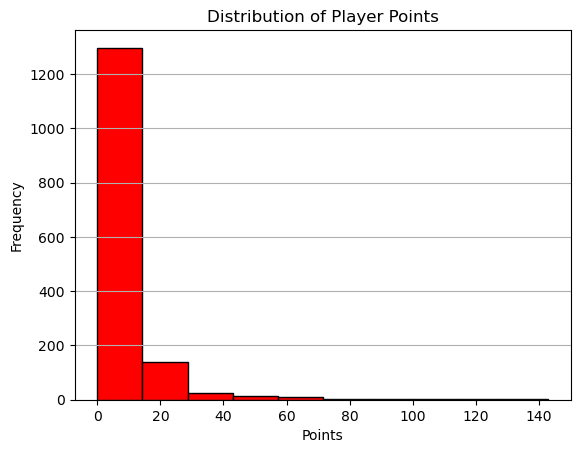

In [28]:
import matplotlib.pyplot as plt

points = list(player_points.values())

plt.hist(points, bins=10, color='red', edgecolor='k')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Distribution of Player Points')
plt.grid(axis='y')
plt.show()

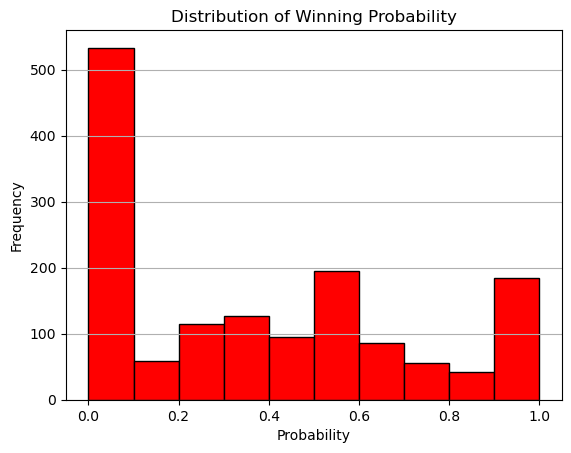

In [29]:
probs = list(win_prob.values())

plt.hist(probs, bins=10, color='red', edgecolor='k')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Winning Probability')
plt.grid(axis='y')
plt.show()

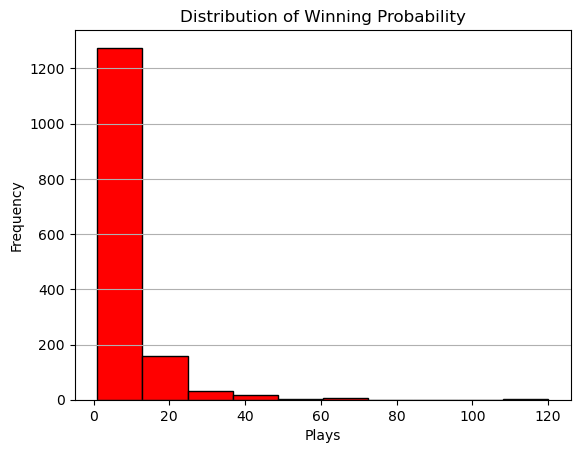

In [30]:
plays = list(num_plays.values())

plt.hist(plays, bins=10, color='red', edgecolor='k')
plt.xlabel('Plays')
plt.ylabel('Frequency')
plt.title('Distribution of Winning Probability')
plt.grid(axis='y')
plt.show()

In [31]:
features = pd.DataFrame({'num_plays': num_plays, 'plays_per_day': plays_per_day, 'win_prob': win_prob, 'points': player_points, 'points_per_day': points_per_day, 'points_per_game': points_per_game})
features

,num_plays,plays_per_day,win_prob,points,points_per_day,points_per_game
3497,5,5.000000,0.400000,5,5.000000,1.000000
1112,13,6.500000,0.615385,16,8.000000,1.230769
3977,30,10.000000,0.166667,14,4.666667,0.466667
2276,11,3.666667,0.181818,8,2.666667,0.727273
852,1,1.000000,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...
2172,1,1.000000,0.000000,0,0.000000,0.000000
1968,3,3.000000,1.000000,6,6.000000,2.000000
1399,1,1.000000,0.000000,1,1.000000,1.000000
3542,1,1.000000,0.000000,1,1.000000,1.000000


In [32]:
features = features.sort_index()
features

,num_plays,plays_per_day,win_prob,points,points_per_day,points_per_game
11,4,4.0,0.000000,0,0.0,0.000000
12,1,1.0,0.000000,0,0.0,0.000000
14,10,10.0,0.900000,18,18.0,1.800000
26,1,1.0,0.000000,0,0.0,0.000000
30,2,2.0,0.000000,0,0.0,0.000000
...,...,...,...,...,...,...
5953,2,2.0,0.500000,2,2.0,1.000000
5956,2,2.0,0.000000,0,0.0,0.000000
5969,5,5.0,0.400000,4,4.0,0.800000
5973,6,6.0,0.166667,4,4.0,0.666667


In [33]:
nan_counts = features.isna().sum()
total_nan_counts = features.isna().sum().sum()

print(nan_counts)
print(f'Total NaN values: {total_nan_counts}')

num_plays          0
plays_per_day      0
win_prob           0
points             0
points_per_day     0
points_per_game    0
dtype: int64
Total NaN values: 0


In [34]:
features.to_pickle('./data/features1_updated.p')

In [39]:
import pickle

with open('./data/features1_updated_new.p', 'rb') as file:
    features1 = pickle.load(file)

print(features1)

      num_plays  plays_per_day  win_prob  points  points_per_day  \
11            4            4.0  0.000000     -12             0.0   
12            1            1.0  0.000000      -3             0.0   
14           10           10.0  0.900000      24            18.0   
26            1            1.0  0.000000      -3             0.0   
30            2            2.0  0.000000      -6             0.0   
...         ...            ...       ...     ...             ...   
5953          2            2.0  0.500000       0             2.0   
5956          2            2.0  0.000000      -6             0.0   
5969          5            5.0  0.400000      -3             4.0   
5973          6            6.0  0.166667      -4             4.0   
5993          1            1.0  0.000000       1             1.0   

      points_per_game  
11          -3.000000  
12          -3.000000  
14           2.400000  
26          -3.000000  
30          -3.000000  
...               ...  
5953         0.

In [42]:
player_records[5993]

[0, 1, 0]